# Лабораторная работа № 1. 
## Предварительная обработка данных.
## Выполнил: Семехин В.Д. 19-ИВТ-3
## Варинат 8: Астронавты(Космонавты)

## Задания:
1. Определите астронавта из США, который провёл наибольшее количество времени в открытом космосе, постройте график, на котором по оси OX отображены астронавты, а по оси OY – время, которое они провели в открытом космосе.
2. Укажите университет, выпустивший наибольшее количество астронавтов, постройте график, на котором по оси OX отображены университеты, а по оси OY – количество астронавтов, которое учились в данном университете.
3. Определите количество военных и гражданских астронавтов.
4. Определите наиболее часто встречающееся среди астронавтов военное звание.
5. Определите количество женщин среди астронавтов
6. Удалите из набора данных астронавтов, для которых не указан бакалавриат. Выведите размер набора данных до и после удаления.
7. Определите количество астронавтов, родом из Техаса.
8. Определите количество миссий, в ходе выполнений которых погибли астронавты.
9. Вычислите корреляцию Пирсона и Спирмена между признаками Gender и Missions. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('astronauts.csv')


In [2]:
df.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [3]:
df.tail()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN
356,George D. Zamka,1998.0,17.0,Retired,6/29/1962,"Jersey City, NJ",Male,US Naval Academy; Florida Institute of Technology,Mathematics,Engineering Management,Colonel,US Marine Corps (Retired),2,692,0,0.0,"STS-120 (Discovery), STS-130 (Endeavor)",NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth Date           357 non-null    object 
 5   Birth Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  335 non-null    object 
 9   Graduate Major       298 non-null    object 
 10  Military Rank        207 non-null    object 
 11  Military Branch      211 non-null    object 
 12  Space Flights        357 non-null    int64  
 13  Space Flight (hr)    357 non-null    int64  
 14  Space Walks          357 non-null    int64  
 15  Space Walks (hr)     357 non-null    flo

In [5]:
df.describe()

,Year,Group,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr)
count,330.000000,330.000000,357.000000,357.000000,357.000000,357.000000
mean,1985.106061,11.409091,2.364146,1249.266106,1.246499,7.707283
std,13.216147,5.149962,1.428700,1896.759857,2.056989,13.367973
min,1959.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,8.000000,1.000000,289.000000,0.000000,0.000000
50%,1987.000000,12.000000,2.000000,590.000000,0.000000,0.000000
75%,1996.000000,16.000000,3.000000,1045.000000,2.000000,12.000000
max,2009.000000,20.000000,7.000000,12818.000000,10.000000,67.000000


In [6]:
df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


## 1.1 Определите астронавта из США, который провёл наибольшее количество времени в открытом космосе.


In [7]:
MaxHour = df['Space Walks (hr)'].argmax()  # Ищем индекс строки с максимальным значением
Name = df['Name'][MaxHour]                 # После чего находим имя космонавтна 
Name, df['Space Walks (hr)'][MaxHour]


('Michael E. Lopez-Alegria', 67.0)

## 2. Укажите университет, выпустивший наибольшее количество астронавтов, постройте график, на котором по оси OX отображены университеты, а по оси OY – количество астронавтов, которое учились в данном университете.

In [8]:
PopularUniv = df['Alma Mater'].str.split('; ', expand=True).stack().value_counts()
print(PopularUniv.idxmax())
# .str.split('; ', expand=True) преобразует столбец в объект Series, элементами которого будут строки, записанные в списки
# Далее строка делится на отдельные элементы после каждого вхождения символа '; '
# Полученная серия из-за аргумента expand=True преобразуется в новый Frame
# Далее метод stack(), работающий с Multiindex возвращает DataFrame с переделанными в сроки столбцами
# Далее метод value_counts() возвращает отсортированный по убыванию объект, а метод idxmax() возвращает конкретный элемент

US Naval Academy


<AxesSubplot:>

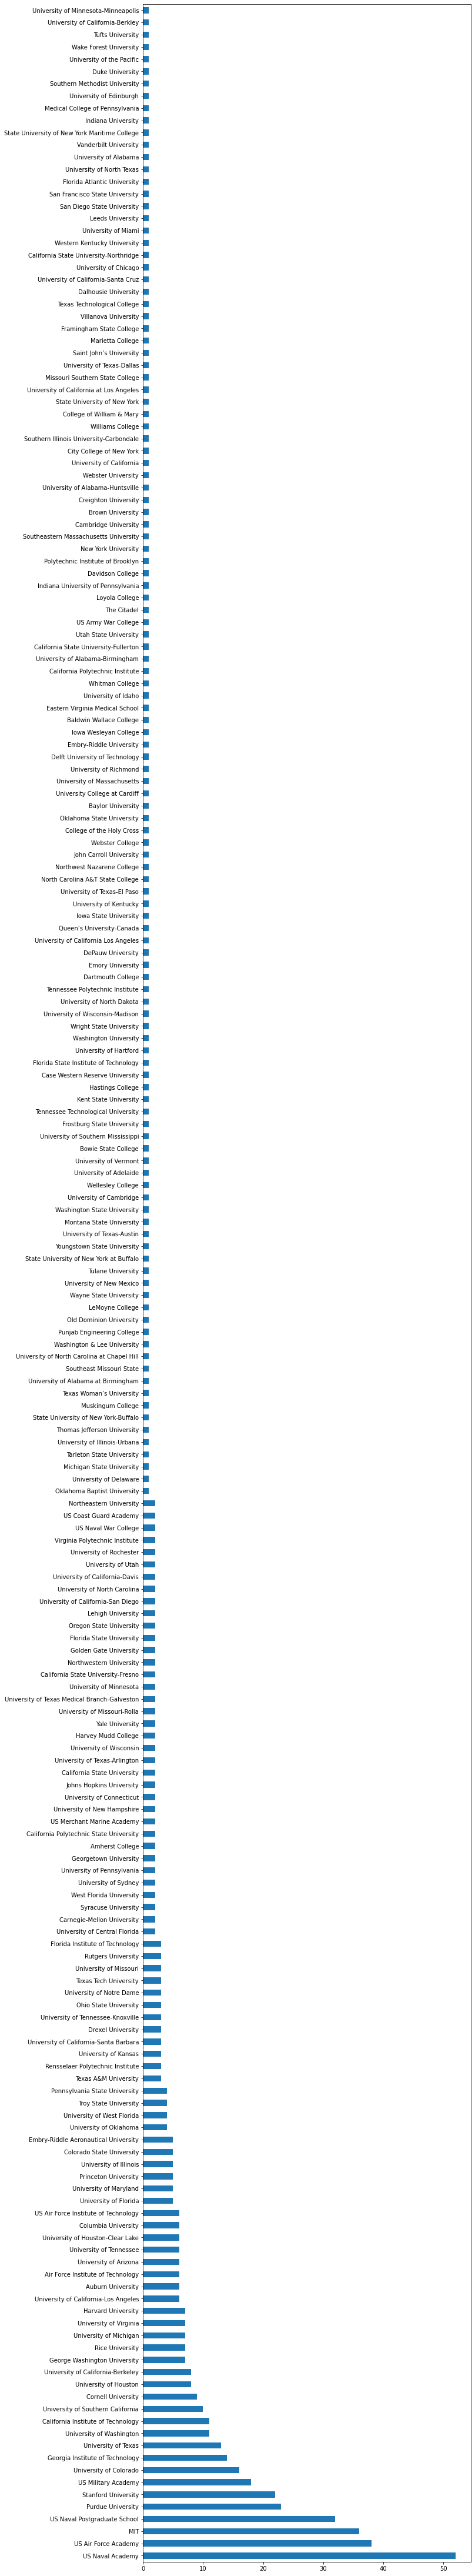

In [9]:
PopularUniv.plot(kind = 'barh', figsize = (10, 80))
# Рисуем график типа 'barh' c размерами фигур (10, 80)

## 3. Определите количество военных и гражданских астронавтов.

In [10]:
Military = df[df['Military Rank'].notna()].shape[0]
# Количество военных равно количеству непустых элементов в столбце 'Military Rank', находим сначала
# элементы, неравные NaN, после чего получаем новый DF без этих элементов.
# В конце с помощью метода shape[0] получаем количество строк в полученном DF
Civilian = df[df['Military Rank'].isna()].shape[0]
# Аналогично для гражданских, только рассматриваются уже элементы, равные NaN 
print("count of Military: ", Military, "\nCount of Civilian: ", Civilian)

count of Military:  207 
Count of Civilian:  150


## 4. Определите наиболее часто встречающееся среди астронавтов военное звание.

In [12]:
# MostPopularRank = df['Military Rank'].str.split('\n',expand=True).stack().value_count()
# # Преобразуем и сортируем столбец с рангами аналогично с поиксом наипопулярнейшего университета
# # можно еще и вот так df['Military Rank'].value_counts().idxmax(), но получить количество уже сложнее
# print(MostPopularRank.idxmax(),MostPopularRank[0])

## 5. Определите количество женщин среди астронавтов

In [13]:
print('Количество женщин равно: ', df[df.Gender == 'Female'].shape[0])
# Выбираем только срочки, где df.Gender == 'Female' и смотрим количество строк

Количество женщин равно:  50


## 6. Удалите из набора данных астронавтов, для которых не указан бакалавриат. Выведите размер набора данных до и после удаления.

In [14]:
print('Количество астронавтов, для которых не указан бакалавриат: ', df[df['Undergraduate Major'].isna()].shape[0])
print('Количество Астронавтов до удаления: ', df.shape[0])
df.dropna(subset=['Undergraduate Major'])
# с помощью метода указываем, что хотим отбрасить NaN значения, а указав аргумент subset=['Undergraduate Major']
# показываем, где их искать
print('Количество астронавтов после удаления: ', df.dropna(subset=['Undergraduate Major']).shape[0])

Количество астронавтов, для которых не указан бакалавриат:  22
Количество Астронавтов до удаления:  357
Количество астронавтов после удаления:  335


## 7. Определите количество астронавтов, родом из Техаса.

In [15]:
print(df['Birth Place'].str.split(',', expand=True).stack().value_counts())
# Приводим нужный столбец к удобному виду, после чего отделяем названия городов от штата
# И выбираем нужный нам штат
df['Birth Place'].str.split(',', expand=True).stack().value_counts()[2]

 NY              30
 CA              25
 TX              23
 OH              21
 PA              20
                 ..
Wapakoneta        1
Neptune           1
Savannah          1
Little Rock       1
Fayettesville     1
Length: 327, dtype: int64


23

## 8. Определите количество миссий, в ходе выполнений которых погибли астронавты.

In [16]:
print('Количество смертельных миссий равно: ', df['Death Mission'].dropna().drop_duplicates().shape[0])
# Отбросили все строчки, в которых миссии несмертельны, отбросили повторяющиеся строки и вывели количество оставшихся

Количество смертельных миссий равно:  3


## 9. Вычислите корреляцию Пирсона и Спирмена между признаками Gender и Missions. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [17]:
def MissionsTransform(m):
    return m.split(', ').__len__()
# Данная функция возвращает количество миссий у астронавта
def GenderTransform(g):
    if g == 'Female': #
        return 0
    else:
        return 1



dft = df.dropna(subset=['Gender', 'Missions'])
# создаем копию нашей DF, в которой убрали всех остранавтов без Миссий и с неопределенным полом
genders = dft['Gender'].apply(lambda g: GenderTransform(g))
# Трансформируем значения поля 'Gender' с помощью GenderTransform
missions = dft['Missions'].apply(lambda m: MissionsTransform(m))
# Трансформируем значения поля 'Missions' с помощью MissionsTransform

pearson_correlation, pearson_pvalue = stats.pearsonr(genders, missions)
# stats.pearsonr реализует корреляцию Пирсона, и возвращает 2 значения : 
# само значение корреляции (pearson_correlation в нашем случае) и p-value (pearson_pvalue у нас)
print('Pearson:')
print('Correlation - ', pearson_correlation)
print('p-value - ', pearson_pvalue)

spearman_correlation, spearman_pvalue = stats.spearmanr(genders, missions)
# Аналогичная ситуция для корреляции Спирмена, только другая функция для расчета
print('\nSpearman:')
print('Correlation - ', spearman_correlation)
print('p-value - ', spearman_pvalue)


Pearson:
Correlation -  -0.022797969624393087
p-value -  0.678039376618327

Spearman:
Correlation -  -0.02411924245940919
p-value -  0.6605118347241736


<AxesSubplot:>

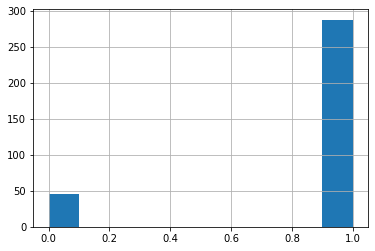

In [18]:
genders.hist()

<AxesSubplot:>

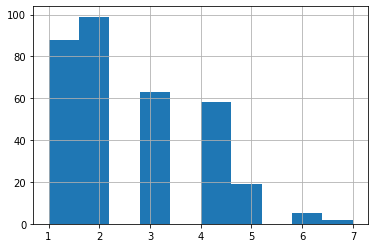

In [19]:
missions.hist()